<a href="https://colab.research.google.com/github/Ekawaka/MACHINE-LEARNING-1/blob/main/Week_4_model_evaluation_and_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Model Evaluation & Optimisatio**n

In [1]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('once')
%matplotlib inline

In [2]:
from sklearn.datasets import load_diabetes, load_wine
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

Day 0: Data Preparation

We'll be working with the load_diabetes toy dataset from Scikit Learn. To understand the dataset, you can find the data description here. To use the load_diabetes function, you can find the code documentation here

In [3]:
diabetes = load_diabetes(scaled=False)
X = diabetes.data
y = diabetes.target
print(X.shape,y.shape)

(442, 10) (442,)


Data Exploration

Let us understand the data better before we use it for modeling and for the rest of the week.

In [4]:
df = pd.DataFrame(X,columns=diabetes.feature_names)
df['progression'] = y
df.head()

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

age  sex   bmi     bp     s1     s2    s3   s4      s5    s6  progression
0  59.0  2.0  32.1  101.0  157.0   93.2  38.0  4.0  4.8598  87.0        151.0
1  48.0  1.0  21.6   87.0  183.0  103.2  70.0  3.0  3.8918  69.0         75.0
2  72.0  2.0  30.5   93.0  156.0   93.6  41.0  4.0  4.6728  85.0        141.0
3  24.0  1.0  25.3   84.0  198.0  131.4  40.0  5.0  4.8903  89.0        206.0
4  50.0  1.0  23.0  101.0  192.0  125.4  52.0  4.0  4.2905  80.0        135.0

In [5]:
df.describe()

age         sex         bmi          bp          s1          s2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               s3          s4          s5          s6  progression  
count  442.000000  442.000000  442.000000  442.000000   442.000000  
mean    49.788462    4.070249    4.641411   91.260181   152.133484  
std     12.934202    1.290450    0.522391   11.496335    77.093005  
min     22.000000    2.000000    3.258100   58.000000    25.000000  
25%     40.250000    3.000000    4.276700   83.250000    87.000000  
50%     48.000000    4.000000    4.620050   91.000000   140.500000  
75%     57.750000    5.000000    4.997200   98.000000   211.500000  
max     99.000000    9.090000    6.107000  124.000000   346.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


**Data Visualisation**

Let us visualise the data to further understand it better before modeling.

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


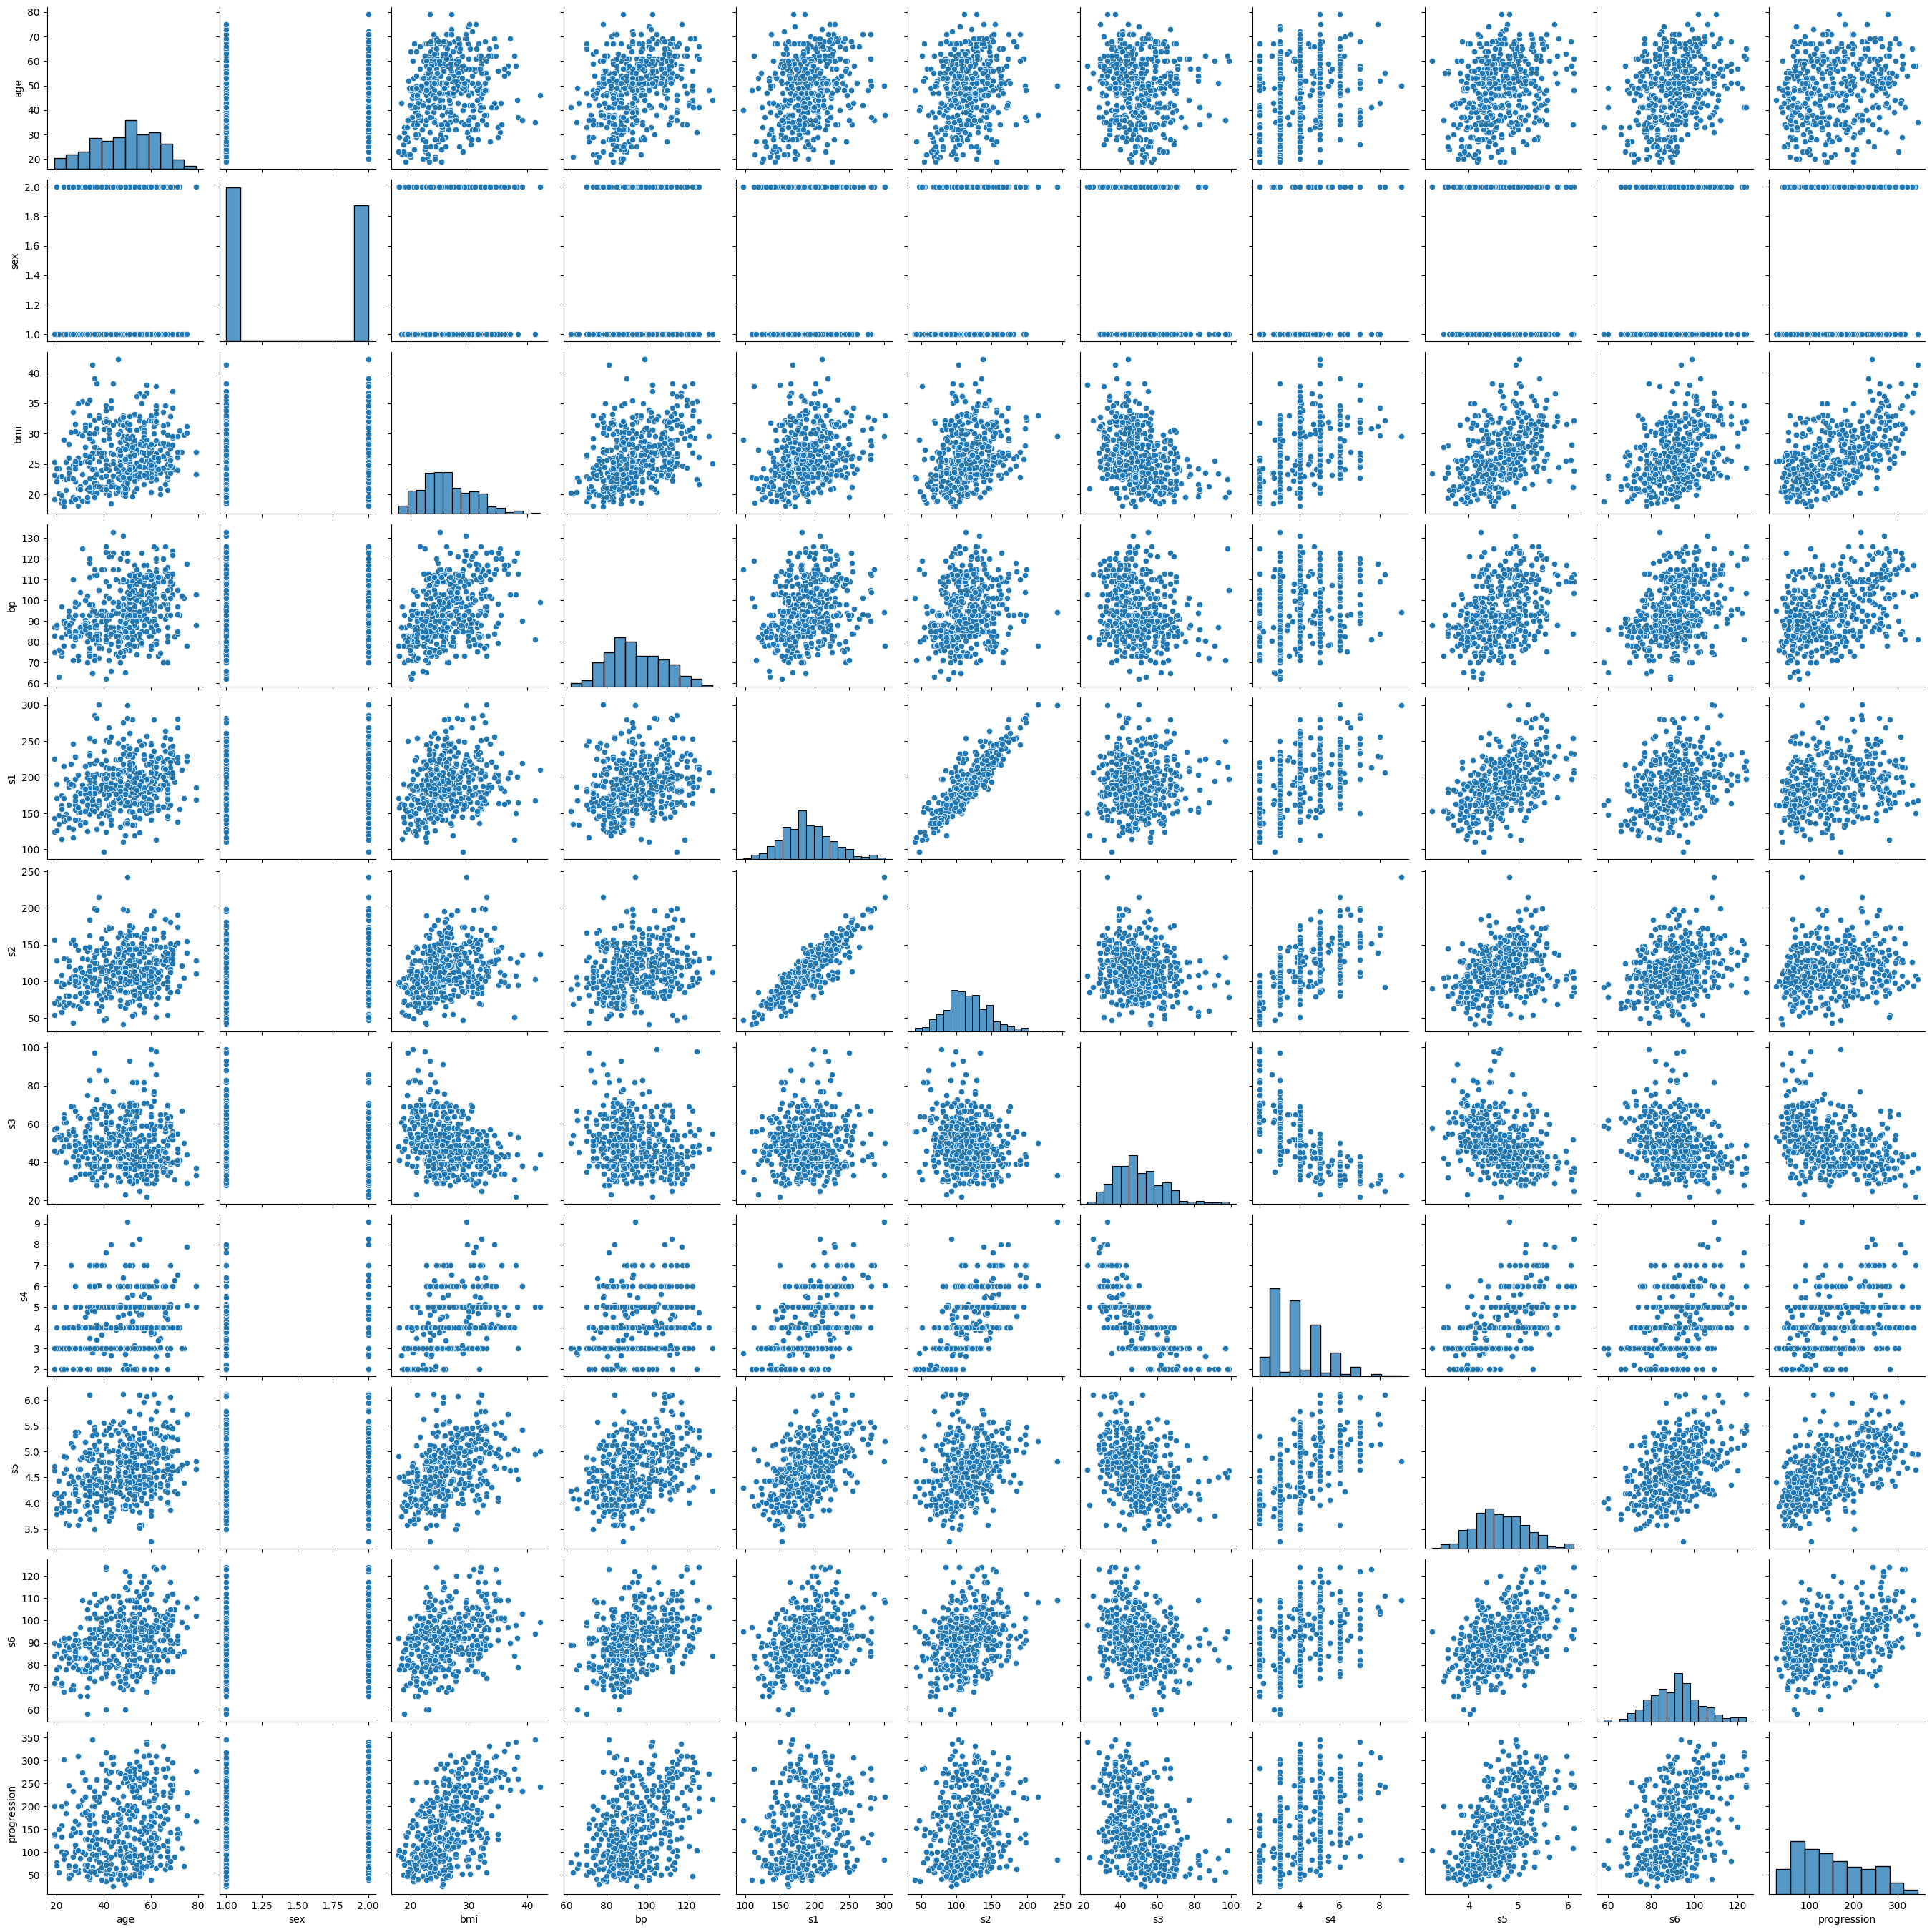

In [7]:
sns.pairplot(df)
plt.show()

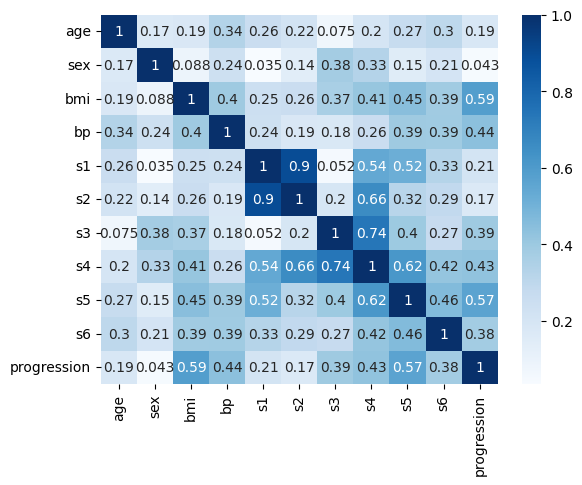

In [8]:
sns.heatmap(df.corr().abs(),annot=True,cmap='Blues')
plt.show()

# **Data Preprocessing**

In [9]:
X = StandardScaler().fit_transform(X)
print(X.shape)

(442, 10)


**Regression Metrics and Hyperparameter Tuning**



### Building and Evaluating Regression Models

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 10) (89, 10) (353,) (89,)


In [11]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
mean_squared_error(y_pred, y_test, squared=False)

64.72786550400934

In [12]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
mean_squared_error(y_pred, y_test)

4189.696572705123

In [13]:
reg = LinearRegression()
scores = -1 * cross_val_score(reg, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(scores, scores.mean())

[52.72497937 55.03486476 56.90068179 54.85204179 53.94638716] 54.69179097275793


In [14]:
pipe = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
scores = -1 * cross_val_score(pipe, X, y, cv=10, scoring='neg_root_mean_squared_error')
print(scores, scores.mean())

[50.33726431 53.57963777 59.26828113 52.5281692  59.62964048 53.85485494
 60.79745904 47.77383819 64.21055126 42.06711867] 54.40468149952541


In [15]:
ridge = Ridge(alpha=10)
scores = -1 * cross_val_score(ridge, X, y, cv=10, scoring='r2')
print(scores, scores.mean())

[-0.54148364 -0.24714207 -0.37424782 -0.61118263 -0.27488655 -0.62360069
 -0.42842659 -0.42406242 -0.42856906 -0.67749925] -0.4631100726954053


### **Hyperparameter Tuning**

In [16]:
ridge = Ridge()
alphas = [1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9]

reg = GridSearchCV(ridge,{'alpha':alphas}, cv=10, scoring='r2').fit(X,y)
print(-1 * reg.best_score_, reg.best_params_)

-0.46272879724788807 {'alpha': 1.9}


In [17]:
ridge = make_pipeline(PolynomialFeatures(),Ridge())
alphas = [1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9]
degrees = [1,2,3]

reg = GridSearchCV(ridge,{'ridge__alpha':alphas,'polynomialfeatures__degree':degrees}, cv=10, scoring='neg_root_mean_squared_error').fit(X,y)
print(-1 * reg.best_score_, reg.best_params_)

54.392876077604306 {'polynomialfeatures__degree': 1, 'ridge__alpha': 1.3}


### **Regression Metrics**

# **R-Squared Score**

We've been using mean_absolute_error and mean_squared_error in the previous examples, therefore, here we'll focus on r2_score and adjusted_r2.

In [18]:
## Let's try Lasso regularisation instead
reg = Lasso().fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_pred,y_test)

-0.4841831678526538

Our model gives us a negative value which means our model performs worse than simply using the mean. Let's verify this by finding the score if we predicted everything as the mean.

In [19]:
y_pred_mean = np.full(len(y_test),y_train.mean()) ## Predict everything as the mean of y_train
r2_score(y_test,y_pred_mean)

-0.007007182684631408

The score is very close to zero as the explain variance is the mean is used is meant to be zero. Therefore, our model is performing worse than if we used the mean as a predictor. Let's see whether this extends to the errors.

In [20]:
### Error score if we use the model predictions
print(mean_squared_error(y_test,y_pred,squared=False),mean_absolute_error(y_test,y_pred))

64.15310785524895 52.18929412014815


In [21]:
### Error score if we use the model predictionsmean
print(mean_squared_error(y_test,y_pred_mean,squared=False),mean_absolute_error(y_test,y_pred_mean))

80.63785187209025 68.60556386669637


Our model does reduce the errors but there is questions on how much of the variance in the data it explains. This might mean that a linear regression is not the best model for this data, we'll investigate it in day 3 when we cover error analysis.

Adjusted R-Squared
Compurted using the formula below:



Where n is the number of observations, and k is the number of features/independent variables

In [22]:
r2 = r2_score(y_pred, y_test)
k = X_test.shape[1]
n = len(y_test)

adjusted_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
adjusted_r2

-0.6744630611670965

If you have more than 1 feature in your data, adjusted R-squared will always yield a value less than R-squared. We definitely want the difference between the two to be extremely small to guarantee that all features used are extremely valuable in explaining the variance in our data.

### **Classificaton Metrics**

**Data Preparation**

Importing Toy Data

In [23]:
wine = load_wine()
X = wine.data
y = wine.target
print(X.shape, y.shape)

(178, 13) (178,)


In [24]:
df = pd.DataFrame(X, columns=wine.feature_names)
df['wine'] = y
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  wine  
0                          3.92   1065.0     0  
1                          3.40   1050.0     0  
2                          3.17   1185.0     0  
3                          3.45   1480.0     0  
4                          2.93    735.0     0

### **Data Exploration**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  wine 

In [26]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

             wine  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

## **Data Visualisation**

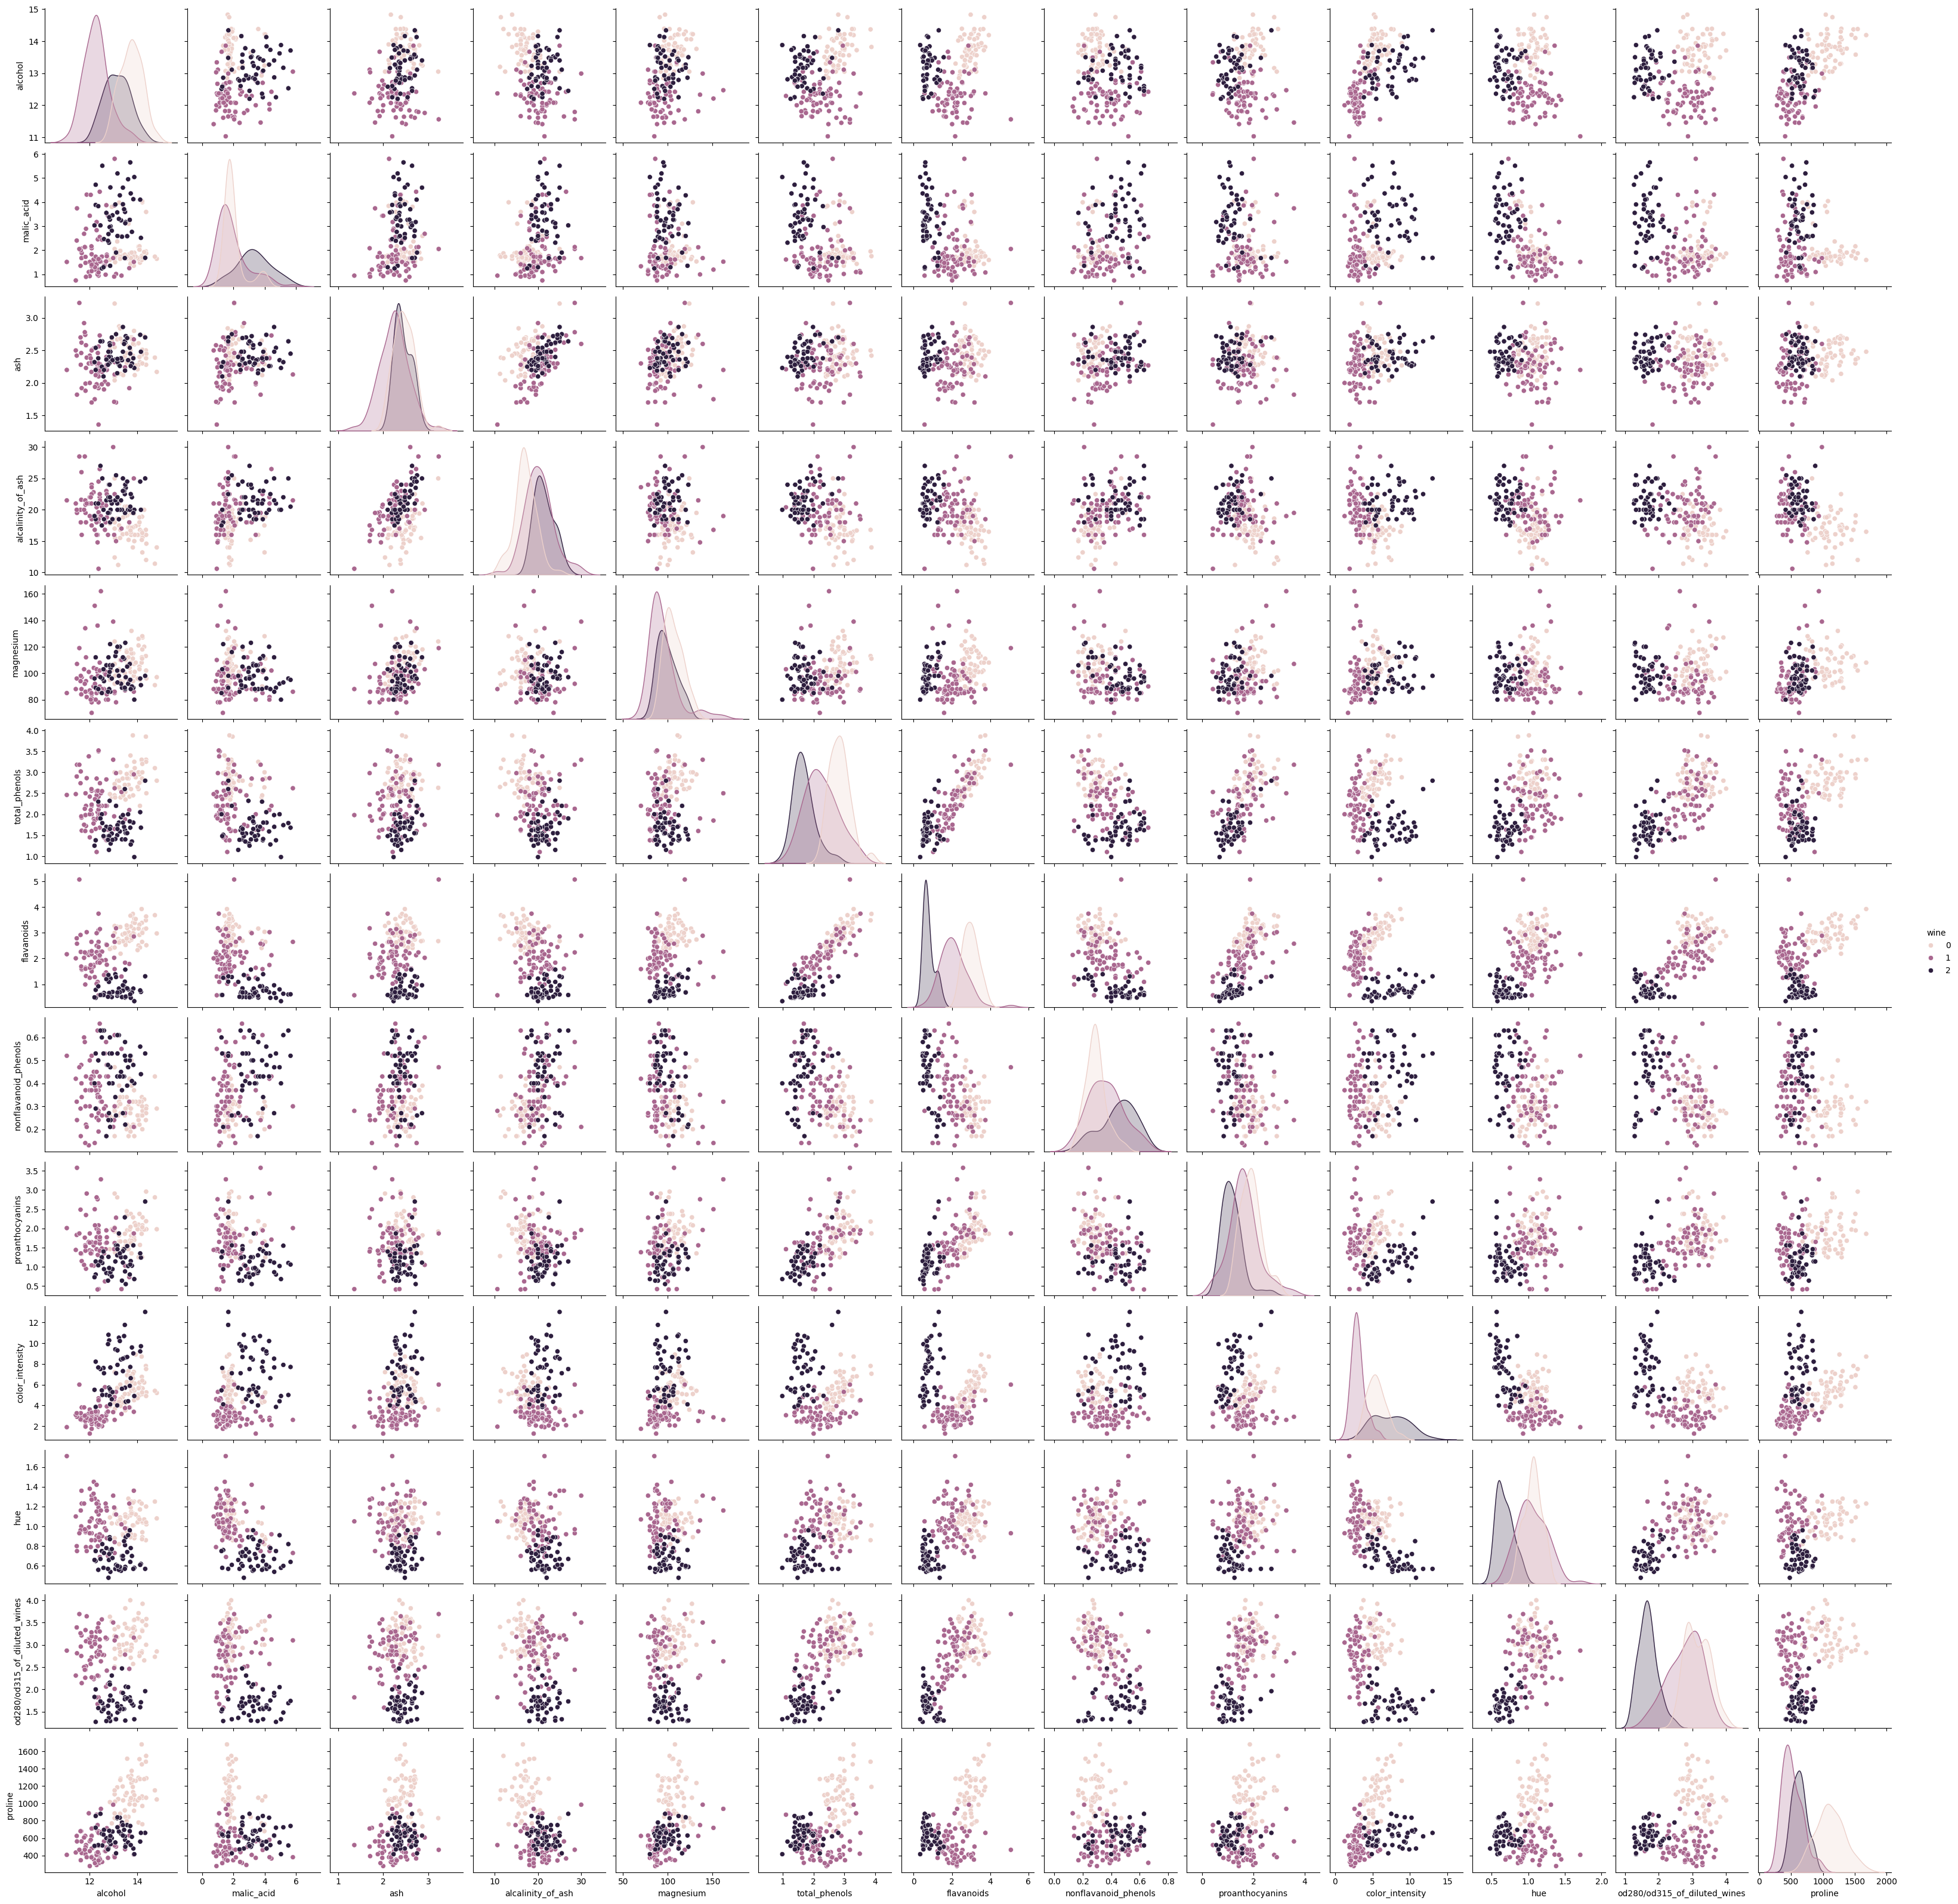

In [27]:
sns.pairplot(df,hue='wine')
plt.show()

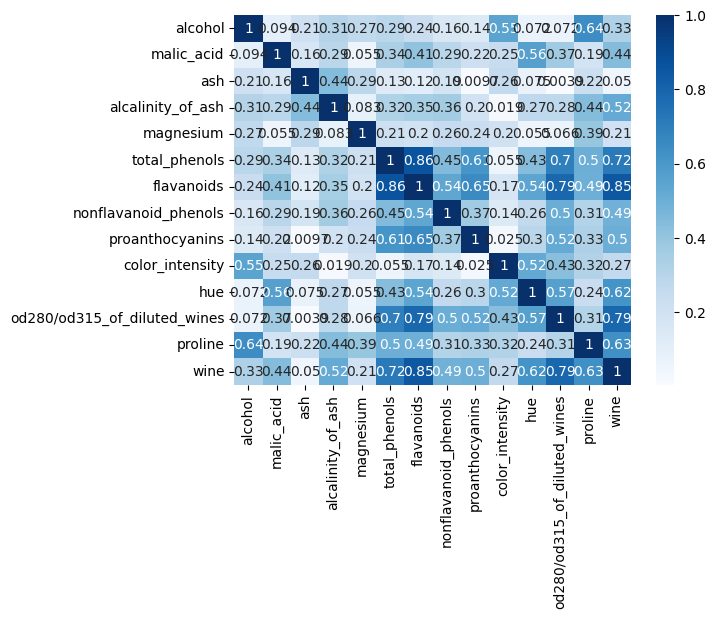

In [28]:
sns.heatmap(df.corr().abs(),annot=True,cmap='Blues')
plt.show()